<a href="https://colab.research.google.com/github/Deepfull/BootCamp/blob/main/Team5_Project_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [10]:
data1 = pd.read_csv('https://raw.githubusercontent.com/Deepfull/BootCamp/main/sample1001.csv')
print(data1.shape)
df1 = data1.copy()
#df1[:3]

data2 = pd.read_csv('https://raw.githubusercontent.com/Deepfull/BootCamp/main/sample1002.csv')
print(data2.shape)
df2 = data2.copy()

(91, 4)
(60, 4)


In [19]:
df1['HVAC_Off'] = 0
df1['HVAC_On'] = 1

df2['HVAC_Off'] = 1
df2['HVAC_On'] = 0

In [20]:
df1[:3]
# df.columns

,Time,On_Off,CA_PM10,CA_PM2.5,HVAC_Off,HVAC_On
0,1,On,40.49,23.37,0,1
1,2,On,40.21,23.57,0,1
2,3,On,40.18,22.67,0,1


(91, 6)

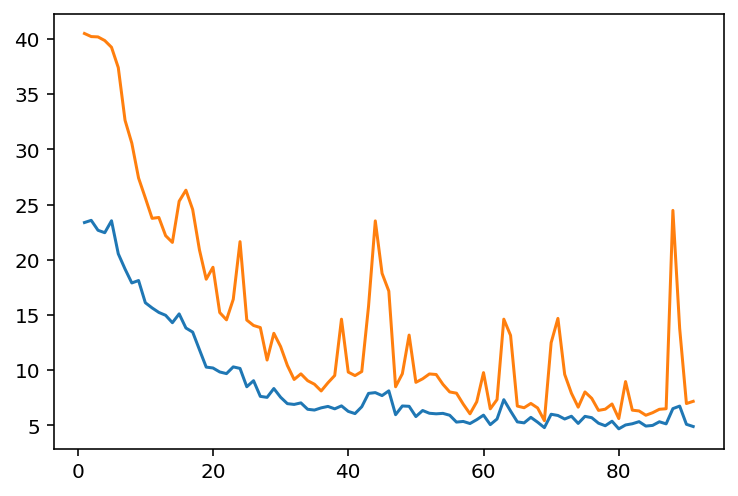

In [24]:
plt.plot(df1['Time'], df1['CA_PM2.5'])
plt.plot(df1['Time'], df1['CA_PM10'])
df1.shape

In [26]:
df1_x = df1[['CA_PM2.5','CA_PM10','HVAC_On','HVAC_Off']][:80]
df1_y = df1[['CA_PM2.5','CA_PM10']][10:90]

df2_x = df1[['CA_PM2.5','CA_PM10','HVAC_On','HVAC_Off']][:50]
df2_y = df1[['CA_PM2.5','CA_PM10']][10:60]

df_x = pd.concat([df1_x, df2_x]) 
df_y = pd.concat([df1_y, df2_y])

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, random_state=9)

In [28]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train =np.array(y_train)
y_test = np.array(y_test)

In [29]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.8377486782038656

In [30]:
y_pred = rfr.predict(X_test)

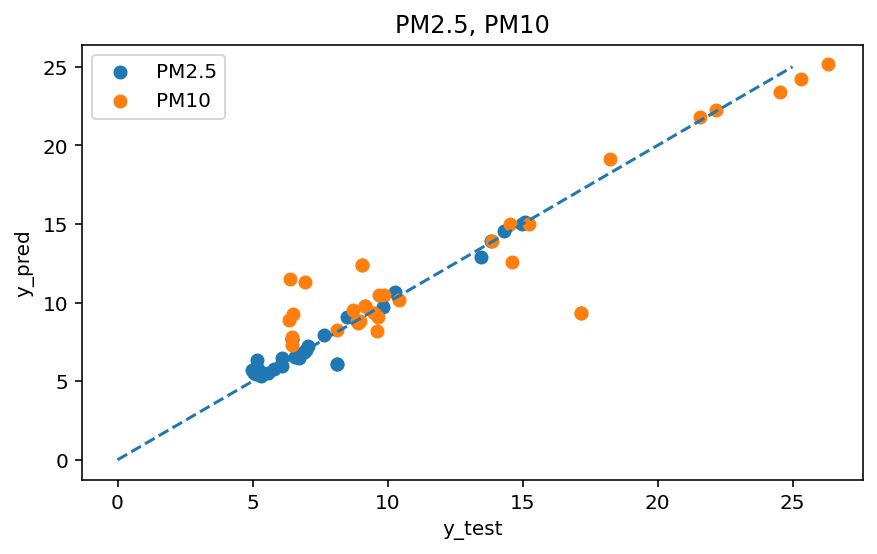

In [31]:
plt.figure(figsize=(7,4))
plt.scatter(y_test[:,0],y_pred[:,0])
plt.scatter(y_test[:,1],y_pred[:,1])
plt.title('PM2.5, PM10')
plt.legend(['PM2.5','PM10'])
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.plot([0,25],[0,25],'--')